*-------------------------------------------------------------------------------------------------*

**Hands-On Machine Learning with Scikit-Learn & TensorFlow**

**Chapter-04 - Logistic Regression**

**Date : 30-March-2020**

*---------------------------------------------------------------------------------------------------*

**_Content :_**

* **Logistic Regression for binary classifier, single and multiple features**
* **Softmax Regreesion for multi-class classifier**


# Logistic Regression

Its a specific type of Generalized Linear Models.

Some regression algorithm can be used for classification (and vice versa). Logistic Regression aka Logit Regression is commonly used to estimate the probability that an instance belongs to a praticular class.

*Its a binary classifier and uses One-vs-Rest scheme for multiclass classification.*

If the predicted probability is greater than 50% then then the instance belongs to class 1 (y=1), otherwise class 0 (y=0).

Just like a linear regression model, a logistic regression model computes a weighted sum of the input features but instead of outputting the result directly like the linear regression model does, it outputs the logistic transformation of this results(score).

<img src="Images/Ch 4 Logistic Regression/log reg 0.jpg" alt="Gradient Descent General" style="width: 700px;"/>

**logit or log-odds:** The weighted some of inpute features plus the bias term generates a score called log-odds. Can range from -inf to +inf.
**probability**: The logistic of log-odds score above would generate the probability of +ve class for that instance.

### How a logistic model is trained?
The objective of the training set is to set the parameter vector of weights such that the model estimates high probabilities for positive instances (y=1) and low probability for negative instances (y=0). The idea is captured by the below cost function:

The cost -log(p) will be very high if probability is low (close to zero) for positive class and cost '-log(1-p)' will be high if high probability for a negative class. You see it penalize the model if model predict wrong probabilities for classes.

**The cost function for a single instance**
<img src="Images/Ch 4 Logistic Regression/log reg 1 .jpg" alt="Gradient Descent General" style="width: 500px;"/>


**Log Loss or Log Likelihood- The cost function:** over a whole training set. The above cost function can be written in a single expression as average cost over all training instances like this.

**There are also other loss function like Hinge Loss for SVM, Huber loss, likelihood loss etc**
<img src="Images/Ch 4 Logistic Regression/log reg 2_1.jpg" alt="Gradient Descent General" style="width: 500px;"/>

And this is how it looks : As you see it higly penalize if predicts different class with high confidence.
<img src="Images/Ch 4 Logistic Regression/Log REg - Log Loss.png" alt="Gradient Descent General" style="width: 500px;"/>



**Gradien Descent Step**
There is no closed form equation to compute the value of weights that minimizes the cost function. Though this cost function is convex, so GD is guaranteed to find the global minimum. This euqation very much look like least square regression.
<img src="Images/Ch 4 Logistic Regression/logit reg 3_1.jpg" alt="Gradient Descent General" style="width: 500px;"/>



### More on Logistict Regression from youtube statsquest:
Links:

**Log Odds**

https://www.youtube.com/watch?v=ARfXDSkQf1Y

**Logistic Regression**

https://www.youtube.com/watch?v=vN5cNN2-HWE

https://www.youtube.com/watch?v=BfKanl1aSG0

https://www.youtube.com/watch?v=xxFYro8QuXA

Notes from above links : 
<img src="Images/Ch 4 Logistic Regression/log odds_1.jpg" alt="Gradient Descent General" style="width: 800px;"/>
<img src="Images/Ch 4 Logistic Regression/log odds_2.jpg" alt="Gradient Descent General" style="width: 800px;"/>
<img src="Images/Ch 4 Logistic Regression/log odds_3.jpg" alt="Gradient Descent General" style="width: 800px;"/>
<img src="Images/Ch 4 Logistic Regression/log odds_4.jpg" alt="Gradient Descent General" style="width: 800px;"/>




# Softmax Regression:
If we need to create multinomial classification, we can use OvR approach using binary classifiers or we can use Softmax regression which is just logistic regression probability calculation for multiclasses. 

Softmax Regression can be learned using LogisticRegression function itself.


In [2]:

from sklearn.linear_model  import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

np.random.seed(10)


# Single Feature, Binary Classification

[-12.53674276]
[[4.4373874]]


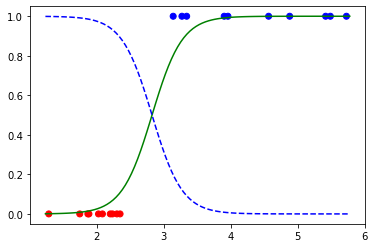

In [4]:
# This is a single feature, binary classification experiment

# 1. Experiment with C, inverse of regularization parameter. Default value 1 which means there will 
#    always be some regularization by default. 
#   -> Lesser the C more the regularization will be, lesser will be weights. And when C is high, model will try to 
#      maximize probabilities as high as possible for correct classifications. 

# 2. Seprable and not seprable data ie overlapping classes.

# Lets create a manual dataset
n = 10
X = np.concatenate((2*np.random.rand(n,1)+1, 3*np.random.rand(n,1)+3))
y = np.concatenate((np.repeat(0,n),np.repeat(1,n)))

#y_train_proba = log_reg.predict_proba(X)
plt.scatter(X[:,0],y, c=y,cmap=cm_bright)


log_clf = LogisticRegression(C=10)
log_clf.fit(X,y)

print(log_clf.intercept_)
print(log_clf.coef_)

# Testing the predicted model
X_test = np.linspace(X[:,0].min()-.05,X[:,0].max()+.05,100).reshape(-1,1) # returns evenly step number over a specified interval, just like range function
y_proba = log_clf.predict_proba(X_test)

plt.plot(X_test, y_proba[:,1], "g-", label = "Class 1")
plt.plot(X_test, y_proba[:,0], "b--", label = "Class 0")

plt.show()


In [20]:
# The coefficient and intercepts calculates the log_odds of the data, 
# for an example what are the log odds at x=3 
x=3 # Value of the feature_x
log_odds = log_clf.coef_[0][0]*3+log_clf.intercept_[0]
print(log_odds)
# We can calculate the probability of the class=1 (and 0) by just transforming 
# this log_odds using the logit funtion
print(np.exp(log_odds)/(1+np.exp(log_odds)))
# Here the probablity is around 0.68 of class 1.

# when probability is 0.5, odds are 1 (=0.5/(1-0.5))
# log of 1 is 0, so log odds is 0
# 0 = log_clf.coef_ * x - log_clf.intercept_
x = -1 * log_clf.intercept_ /log_clf.coef_ 
print('x where the probability of either class is 0.5 : ',x)

0.7754194559811456
0.6846920632039777
x where the probability of either class is 0.5 :  [[2.82525315]]


In [21]:
# Function to plot decision boundry, restricted to 2-d plots ie 2 features
def plot_decision_boundry(model,X):
    x1, x2 = np.meshgrid(np.arange(X[:,0].min() -.5, X[:,0].max() +.5 , 0.05),
                         np.arange(X[:,1].min() -.5, X[:,1].max() +.5,  0.05))
    y_plot_pred_probs = model.predict_proba(np.c_[x1.ravel(), x2.ravel()])[:,1]

    plt.contourf(x1,
                 x2,
                 y_plot_pred_probs.reshape(x1.shape), cmap=cm_bright, alpha=.1)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.show()
    
    y_scores = model.decision_function(np.c_[x1.ravel(), x2.ravel()]) # log_odds
    
    y_prob2 = np.exp(y_scores) / (np.exp(y_scores) +1) # which is nothing but probability of class 1

    print(y_scores.max())
    plt.scatter(y_scores, y_prob2, c="g")
    plt.xlabel('Scores (log-odds)')
    plt.ylabel('Probability')
    plt.show()

# Number of features = 2, binary classes, linear seperable problem

[[6.24538286 1.50563122]] [-30.82939684]


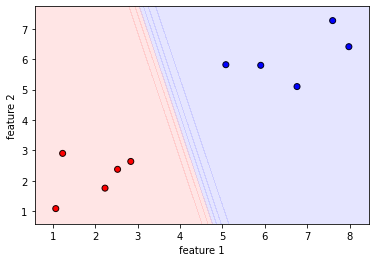

33.69851348076927


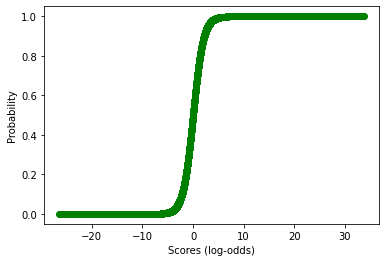

In [28]:
# Lets create a manual dataset

# Now you can see two plots one is features on x and y and decision boundry
# another one is scores (log-odds) genereted from model using 'decision_function' and probability.

# Experiment with C and look how the decision boundry and predicted probability changes

n = 5
X = np.concatenate((2*np.random.rand(n,2)+1,3*np.random.rand(n,2)+5))
y = np.concatenate((np.repeat(0,n),np.repeat(1,n)))

log_clf = LogisticRegression(C=100000)
log_clf.fit(X,y)
print(log_clf.coef_, log_clf.intercept_) 

#y_train_proba = log_reg.predict_proba(X)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_bright,
            edgecolor='k')

plot_decision_boundry(log_clf,X)



## How does the outlier affects the decision boundry

Note that regularization is applied by default in the Logsitic Regression in sklearn package. Default penalty is l2, with lambda =1. Though there is no lambda but a hyperparameter C which is a regularization parameter and multiplied to cost function instead of penalty. Default value of C is 1, means cost and penalt are equally weighted. More the C is less regualrized the learning will be.

How C values affects the decision boundry.

More the C value, lesser will be regularization and higher will be weights and hence lesser functional margin.


As you see in the below example. Regularization not only shrinks the wights for the features but also helps in deal with outliers (a different kind of generalization).

With very less regularization, model tries hard to classifiy the outlier also, and hence high weights and very small marginal model. And if you keep the enough high penalty, the decision boundry ignores outlier and gives us high marginal model.

We will learn more about high margin models in future.

high weights and low weights can have similar decision boundrys, only that the "y" (the function output, functional margin) value will be low in case of lower weights. instead higher weights tend to give high probabilities to class 1 and hence can kind of overfit.

Just play with C value for added outlier and you get to know about it.


[[0.89607739 0.92677425]] [-6.214192]


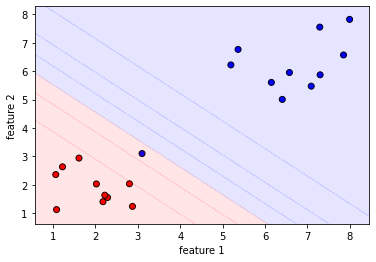

9.041964031683667


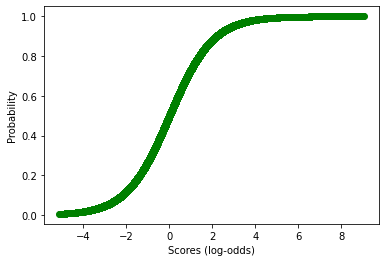

In [10]:
# Now add an outlier to the above data, class 1 instance very near to class 0.
X2 = np.concatenate((X, np.array([[3.1,3.1]])))
y2 = np.concatenate((y,[1]))

log_clf = LogisticRegression(C=1)
log_clf.fit(X2,y2)
print(log_clf.coef_, log_clf.intercept_) 

#y_train_proba = log_reg.predict_proba(X)
plt.scatter(X2[:,0],X2[:,1],c=y2,cmap=cm_bright,
            edgecolor='k')

plot_decision_boundry(log_clf,X2)
plt.show()



# For non-linear separable binary classes

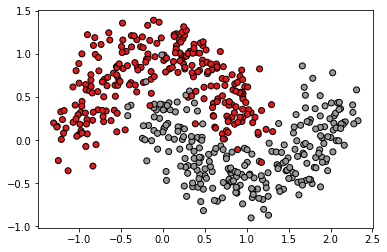

In [11]:
# Lets make a polynomial classifier for non-linear classification problem

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import accuracy_score

# Generating the data
# Training Set
X,y = make_moons(n_samples = 500, noise =0.2)
# Test Set
X_test,y_test = make_moons(n_samples = 1000, noise =.2)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()

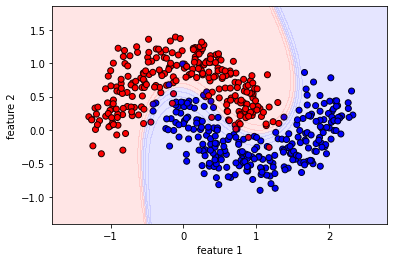

161.61001566372093


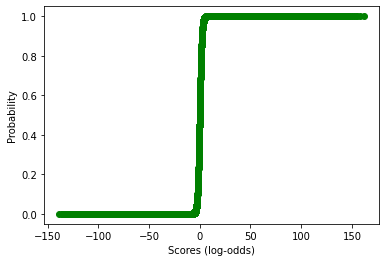

--> Accuracy of the model on Trainset:  0.97
--> Accuracy of the model on Testset:  0.975


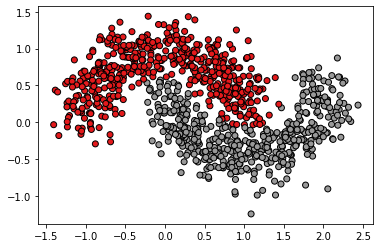

       prediction on the test data


In [25]:
# Training the model
poly_logistic_reg = Pipeline([
    ("Polynomial" , PolynomialFeatures(degree=3,include_bias = False)),
    ("Scaler" , StandardScaler()),
    ("Logistic_Reg" , LogisticRegression(C=100))
])
poly_logistic_reg.fit(X,y)

# Generating a decesion boundry for the model
import numpy as np


plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_bright,
            edgecolor='k')
plot_decision_boundry(poly_logistic_reg,X)

plt.show()




y_pred = poly_logistic_reg.predict(X)            # Train data
y_test_pred = poly_logistic_reg.predict(X_test)  # Test data

#print('--> Coefficients for score genration : ',poly_logistic_reg["Logistic_Reg"].coef_, poly_logistic_reg["Logistic_Reg"].intercept_) 
print('--> Accuracy of the model on Trainset: ',accuracy_score(y,y_pred))
print('--> Accuracy of the model on Testset: ',accuracy_score(y_test,y_test_pred))

plt.scatter(X_test[:,0],X_test[:,1],c = y_test_pred,cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()
print('       prediction on the test data')


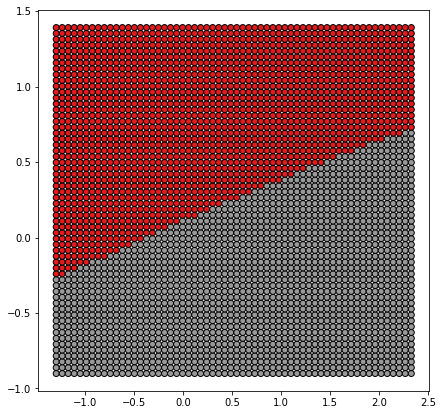

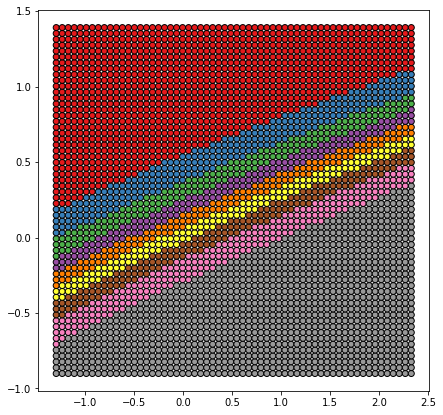

In [17]:
# On Test data


# Generating a decesion boundry for the model
import numpy as np
x1 = np.linspace(X[:,0].min(),X[:,0].max(),60)
x2 = np.linspace(X[:,1].min(),X[:,1].max(),60)
#print(x1)
#print(x2)
X_plot = np.array(np.meshgrid(x1,x2)).T.reshape(-1,2)
y_plot_pred_probs = poly_logistic_reg.predict_proba(X_plot)[:,1]
y_plot_pred = poly_logistic_reg.predict(X_plot)

plt.figure(figsize=(7, 7))#,    dpi=dots_per_inch)
plt.scatter(X_plot[:,0],X_plot[:,1], c = y_plot_pred,cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()

plt.figure(figsize=(7, 7))#,    dpi=dots_per_inch)


#plt.contourf(x1,
#             x2,
#             y_plot_pred_probs.reshape(x1.shape[0],x2.shape[0]), cmap=cm_bright, alpha=.8)


plt.scatter(X_plot[:,0],X_plot[:,1], c = y_plot_pred_probs,cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()



# Number of Classes >= 3
# Softmax Regression / Multinomial Logistic Regression
The logistic regression can be genralized to support multiple classes directly, without having to train and combine multiple binary classifiers.

Experiment on iris data at last

# Iris dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

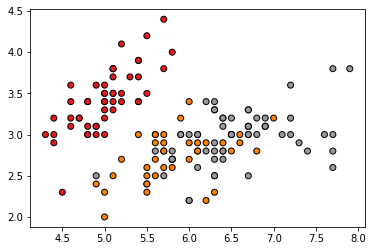

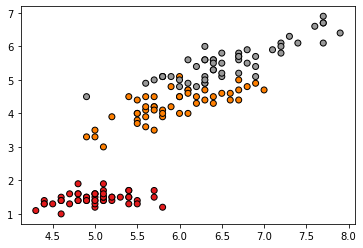

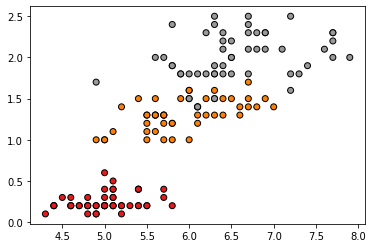

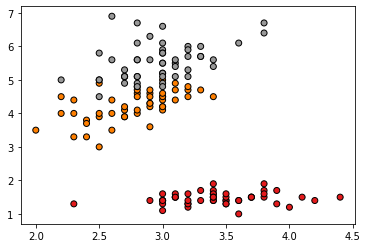

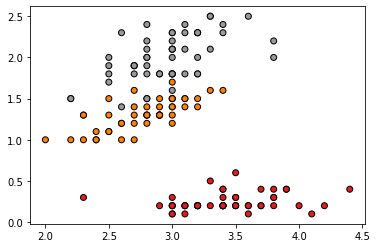

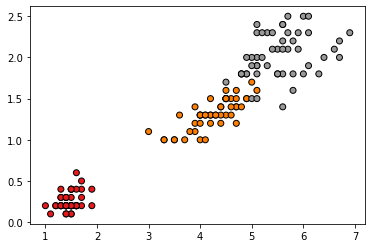

[[4.3330846]] [-7.1947083]
[[-3.38829757  3.1645277 ]] [8.32330389]


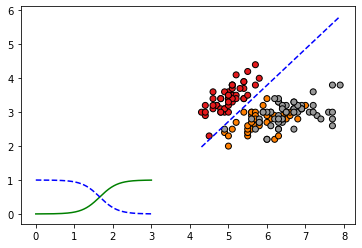

The dashed line represent the model esimates 50% probability: This is the model's w0 + w1*x1 +w2*x2 = 0
decision boundry
[[-5.90754919 -2.93121736]
 [ 1.54792812 -3.11693782]
 [ 5.42084462  9.24110768]] [ 17.22395892  -2.84920023 -41.6724537 ]


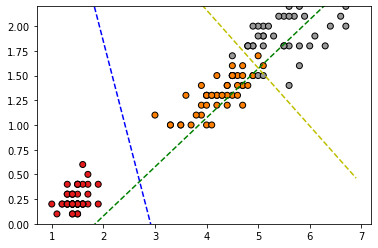

The dashed line represent the model esimates 50% probability: This is the model's w0 + w1*x1 +w2*x2 = 0
decision boundry


In [198]:
from sklearn import datasets
iris = datasets.load_iris()

#print(iris.keys())
#print(iris['filename'])
print(iris['DESCR'])
#print(iris['target_names'])
#print(iris['target'])
#print(iris['feature_names'])
#print(iris['data'])
X = iris['data']
y = iris['target']

#print(features[0,:])  #First instance
#print(features[:,0])  #First feature
import numpy as np
def describe(x):
    print('min', x.min(),'mean', np.round(x.mean()), 'max', x.max())

for i in range(0,4):
    describe(X[:,i])

classes = iris['target_names']
feature_names = iris['feature_names']
for j in range(0,3):
    print('Class:',classes[j])
    for i in range(0,4):
        print('Feature:', feature_names[i])
        x = X[:,i]
        describe(x[ y==j])# 

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()

plt.scatter(X[:,0],X[:,2],c=y,cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()
plt.scatter(X[:,0],X[:,3],c=y,cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()

plt.scatter(X[:,1],X[:,2],c=y,cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()
plt.scatter(X[:,1],X[:,3],c=y,cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()

plt.scatter(X[:,2],X[:,3],c=y,cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()


#Lets convert the above problem to a single feature and binary class problem for now.

X = iris['data'][:,3:]  # Petal Width, We need matrix so we did 3: fiter instead of 3
y = (iris["target"] == 2).astype(np.int)  # 1 If class 2, Verginiaca, else 0 for class 1 and 2

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)
print(log_reg.coef_, log_reg.intercept_) # This will generate a score, which will be transformed to a probability 
                                         # via logistic function

# Testing the predicted model
X_test = np.linspace(0,3,1000).reshape(-1,1) # returns evenly step number over a specified interval, just like range function
y_proba = log_reg.predict_proba(X_test)

plt.plot(X_test, y_proba[:,1], "g-", label = "Verginiaca")
plt.plot(X_test, y_proba[:,0], "b--", label = "Not Verginiaca")
plt.show()
#Lets convert the above problem to a two feature and binary class problem for now.

X = iris['data'][:,0:2]  # Petal Width, We need matrix so we did 3: fiter instead of 3
y = (iris["target"] == 0).astype(np.int)  # 1 If class 2, Verginiaca, else 0 for class 1 and 2

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)
print(log_reg.coef_, log_reg.intercept_) # This will generate a score, which will be transformed to a probability 
                                         # via logistic function

    
#y_train_proba = log_reg.predict_proba(X)
plt.scatter(X[:,0],X[:,1],c=iris["target"],cmap=plt.cm.Set1,
            edgecolor='k')

x = np.linspace(X[:,0].min(),X[:,0].max(),100)
y = -1/log_reg.coef_[0,1] * (log_reg.coef_[0,0]*x + log_reg.intercept_[0]) 
plt.plot(x, y, 'b--', label='y=2x+1')
plt.show()

print("The dashed line represent the model esimates 50% probability: This is the model's w0 + w1*x1 +w2*x2 = 0")
print("decision boundry")
# Testing the predicted model
#X_test = np.linspace(0,3,1000).reshape(-1,1) # returns evenly step number over a specified interval, just like range function
#y_proba = log_reg.predict_proba(X_test)

#plt.plot(X_test, y_proba[:,1], "g-", label = "Verginiaca")
#plt.plot(X_test, y_proba[:,0], "b--", label = "Not Verginiaca")

# Lets try to classify all the classes simulatenously. 
# Logistic regression makes different binary classifier and uses one vs rest to come up with final prediction

X = iris['data'][:,2:4]  # Petal Width, We need matrix so we did 3: fiter instead of 3
y = iris["target"]

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class = 'ovr',solver = 'lbfgs', C=100)  # for one vs rest, use multi_class = 'ovr'
log_reg.fit(X,y)
print(log_reg.coef_, log_reg.intercept_) 

# For 3 classes there will be total 3 classifier: class 1 vs rest, class 2 vs rest, class 3 vs rest
    
    
#y_train_proba = log_reg.predict_proba(X)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Set1,
            edgecolor='k')

x = np.linspace(X[:,0].min(),X[:,0].max(),100)
y1 = -1/log_reg.coef_[0,1] * (log_reg.coef_[0,0]*x + log_reg.intercept_[0]) # classifer 1
y2 = -1/log_reg.coef_[1,1] * (log_reg.coef_[1,0]*x + log_reg.intercept_[1]) # 2 
y3 = -1/log_reg.coef_[2,1] * (log_reg.coef_[2,0]*x + log_reg.intercept_[2]) # 3

plt.plot(x, y1, 'b--', label='y=2x+1')
plt.plot(x, y2, 'g--', label='y=2x+1')
plt.plot(x, y3, 'y--', label='y=2x+1')
plt.ylim(0,2.2)
plt.show()

print("The dashed line represent the model esimates 50% probability: This is the model's w0 + w1*x1 +w2*x2 = 0")
print("decision boundry")
# Testing the predicted model
#X_test = np.linspace(0,3,1000).reshape(-1,1) # returns evenly step number over a specified interval, just like range function
#y_proba = log_reg.predict_proba(X_test)

#plt.plot(X_test, y_proba[:,1], "g-", label = "Verginiaca")
#plt.plot(X_test, y_proba[:,0], "b--", label = "Not Verginiaca")

# Number of Classes >= 3
# Softmax Regression / Multinomial Logistic Regression
The logistic regression can be genralized to support multiple classes directly, without having to train and combine multiple binary classifiers.

Experiment on iris data at last

In [ ]:
# Lets try to classify all the classes simulatenously
# To use softmax instead logistic, just add a hyperparameter "multi_class = 'multinomial'"
X = iris['data'][:,2:4]  # Petal Width, We need matrix so we did 3: fiter instead of 3
y = iris["target"]

log_reg = LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs')
log_reg.fit(X,y)
print(log_reg.coef_, log_reg.intercept_) 
  
#y_train_proba = log_reg.predict_proba(X)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Set1,
            edgecolor='k')

x = np.linspace(X[:,0].min(),X[:,0].max(),100)
y1 = -1/log_reg.coef_[0,1] * (log_reg.coef_[0,0]*x + log_reg.intercept_[0]) # classifer 1
y2 = -1/log_reg.coef_[1,1] * (log_reg.coef_[1,0]*x + log_reg.intercept_[1]) # 2 
y3 = -1/log_reg.coef_[2,1] * (log_reg.coef_[2,0]*x + log_reg.intercept_[2]) # 3

plt.plot(x, y1, 'b--', label='y=2x+1')
plt.plot(x, y2, 'g--', label='y=2x+1')
plt.plot(x, y3, 'y--', label='y=2x+1')
plt.ylim(0,2.2)
plt.show()

print("The dashed line represent the model esimates 50% probability: This is the model's w0 + w1*x1 +w2*x2 = 0")
print("decision boundry")
# Testing the predicted model
#X_test = np.linspace(0,3,1000).reshape(-1,1) # returns evenly step number over a specified interval, just like range function
#y_proba = log_reg.predict_proba(X_test)

#plt.plot(X_test, y_proba[:,1], "g-", label = "Verginiaca")
#plt.plot(X_test, y_proba[:,0], "b--", label = "Not Verginiaca")